In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
from os.path import expanduser

sys.path.append("{0}/repos/polso/strava/".format(expanduser("~")))

import pandas as pd
import datetime

from IPython.display import Markdown

from strava_dash import StravaScraper


In [2]:
YD_2_MILES = 0.0006

In [3]:
def filter_pbear(training):
    training.swims = training.swims.query("temperature <= 56")
    training.total_yards = int(training.swims.distance.sum())
    return training

In [4]:
%%capture
training = StravaScraper()
training.get_swims(after='2020-12-21', before='2021-03-21')
training = filter_pbear(training)

2020-12-23 11:07:32.274 | INFO     | stravaio:strava_oauth2:343 - serving at port 8000
2020-12-23 11:07:34.919 | DEBUG    | stravaio:run_server_and_wait_for_token:397 - code: 25bd495a24d796894637ab25389cdd246198d893
2020-12-23 11:07:35.368 | DEBUG    | stravaio:run_server_and_wait_for_token:406 - Authorized athlete: 8b95c9882b627e2c009cb21c0251df57743e6c4d


# Distance

In [5]:
from IPython.display import Markdown

Markdown("""
##### Total Yards: {0} 
""".format(training.total_yards * YD_2_MILES))


##### Total Yards: 2.0136 


# Time

In [5]:
Markdown("""
##### Total Hours: {0} 
""".format(training.swims.hours.sum()))


##### Total Hours: 1.3519444444444444 


# Analytics

In [6]:
training.monthly_yardage

,distance,hours,weekly distance
start_date,,,
December,3356.6,1.351944,839.15


## Yards

/opt/anaconda3/lib/python3.7/site-packages/pandas/plotting/_matplotlib/core.py:253: FutureWarning: Passing integers to fillna is deprecated, will raise a TypeError in a future version.  To retain the old behavior, pass pd.Timedelta(seconds=n) instead.
  data = data.fillna(fillna)


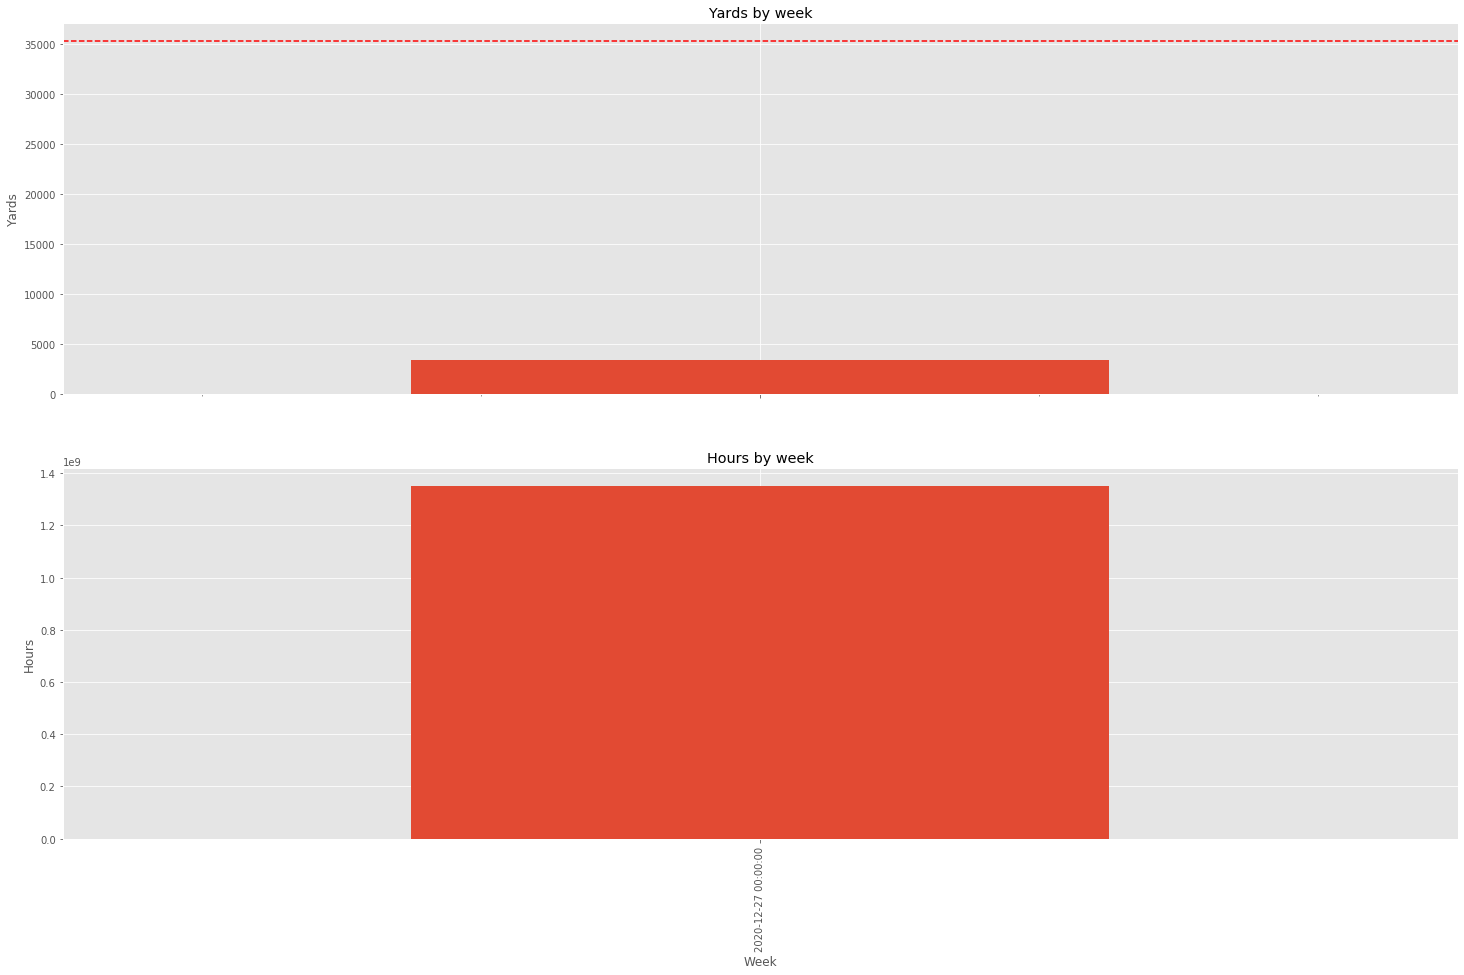

In [16]:
tmp = training.plot_summary()

In [17]:
training.swims

,name,id,temperature,stroke_count,average_speed,elapsed_time,distance,month,month_name,ds_week_ending,ds_month_ending,is_pool,hours
start_date,,,,,,,,,,,,,
2020-12-22 07:02:34-08:00,Last one for the road!,4504667585,51.8,67.2,0.652,00:46:02,1801.6,12,Dec,2020-12-27,2020-12-31,open water,0.767222
2020-12-21 12:43:16-08:00,Let the polar bear begin!,4501614222,51.8,65.6,0.739,00:35:05,1555.0,12,Dec,2020-12-27,2020-12-31,open water,0.584722
